In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Dropout, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


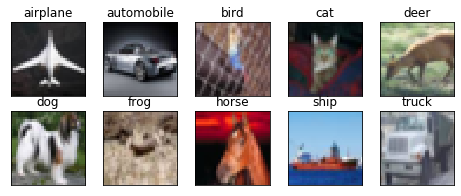

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 15s 38ms/step - loss: 1.8958 - acc: 0.2806 - val_loss: 1.4379 - val_acc: 0.4612
Epoch 2/50
390/390 [==============================] - 7s 18ms/step - loss: 1.3456 - acc: 0.5124 - val_loss: 1.1200 - val_acc: 0.5998
Epoch 3/50
390/390 [==============================] - 7s 17ms/step - loss: 1.1213 - acc: 0.6018 - val_loss: 0.9553 - val_acc: 0.6641
Epoch 4/50
390/390 [==============================] - 7s 17ms/step - loss: 0.9900 - acc: 0.6493 - val_loss: 0.8479 - val_acc: 0.7012
Epoch 5/50
390/390 [==============================] - 7s 17ms/step - loss: 0.8936 - acc: 0.6870 - val_loss: 0.7898 - val_acc: 0.7312
Epoch 6/50
390/390 [==============================] - 7s 17ms/step - loss: 0.8205 - acc: 0.7152 - val_loss: 0.7765 - val_acc: 0.7305
Epoch 7/50
390/390 [==============================] - 7s 18ms/step - loss: 0.7674 - acc: 0.7360 - val_loss: 0.6884 - val_acc: 0.7642
Epoch 8/50
390/390 [==============================] - 7s 18m

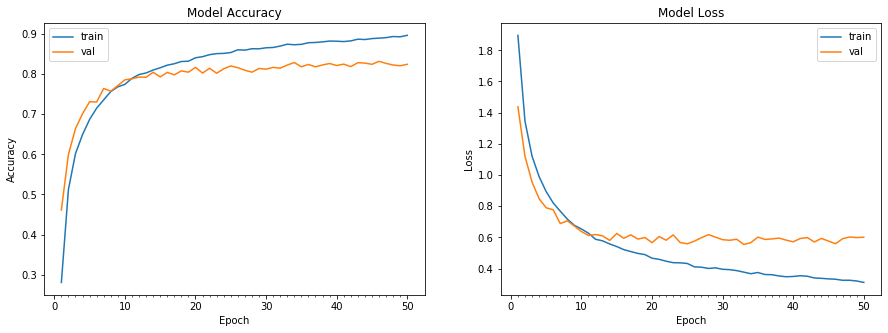

Accuracy on test data is: 82.45


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**Best Accuracy:**
Epoch 46/50
390/390 [==============================] - 7s 18ms/step - loss: 0.3310 - acc: 0.8897 - val_loss: 0.5589 - val_acc: 0.8319

**Last Accuracy:**
Epoch 50/50
390/390 [==============================] - 7s 18ms/step - loss: 0.3105 - acc: 0.8967 - val_loss: 0.6007 - val_acc: 0.8245

<H1>CREATING NEW MODEL WITH LESS THAN 100,000 PARAMS, DEPTHWISE SEPARABLE CONVOLUTIONS, BATCHNORMALIZATION, PROPER DROPOUT VALUES, BASIC IMAGE AUGMENTATION, KERNEL REGULARIZER, LR SCHEDULER AND WITHIN 50 EPOCHS

In [0]:
# New model
model = Sequential()
model.add(SeparableConv2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3), depthwise_regularizer=l2(1e-4))) # 32, 3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(SeparableConv2D(48, 3, 3, border_mode='same', depthwise_regularizer=l2(1e-4))) # 32, 5
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(SeparableConv2D(64, 3, 3, depthwise_regularizer=l2(1e-4))) # 30, 7
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) # 15, 8
model.add(BatchNormalization())
model.add(Convolution2D(32, 1, 1)) #15, 8
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(SeparableConv2D(64, 3, 3, border_mode='same', depthwise_regularizer=l2(1e-4))) # 15, 12
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(SeparableConv2D(128, 3, 3, depthwise_regularizer=l2(1e-4))) # 13, 16
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) # 6, 18
model.add(BatchNormalization())
model.add(Convolution2D(64, 1, 1)) # 6, 18
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(SeparableConv2D(64, 3, 3, border_mode='same', depthwise_regularizer=l2(1e-4))) # 6, 26
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(SeparableConv2D(128, 3, 3, border_mode='same', depthwise_regularizer=l2(1e-4))) # 6, 34
model.add(Activation('relu'))
model.add(Convolution2D(10, 1, 1))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), input_shape=(32, 32, 3..., depthwise_regularizer=<keras.reg..., padding="same")`
  







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), depthwise_regularizer=<keras.reg..., padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), depthwise_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), depthwise_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `SeparableConv2D` call to the Keras

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 32, 32, 32)        155       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 32, 32, 48)        1872      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 48)       

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    if epoch > 40:
        lr = 1e-4
    elif epoch > 30:
        lr = 0.5e-3
    elif epoch > 20:
        lr = 1e-3
    elif epoch > 10:
        lr = 0.5e-2
    else:
        lr = 1e-2
    print('Learning rate (from LearningRateScheduler): ', lr)
    return lr

scheduler = LearningRateScheduler(lr_schedule)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()




Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Learning rate (from LearningRateScheduler):  0.01
390/390 [==============================] - 29s 76ms/step - loss: 1.4878 - acc: 0.4534 - val_loss: 2.3691 - val_acc: 0.3796
Epoch 2/50
Learning rate (from LearningRateScheduler):  0.01
390/390 [==============================] - 24s 61ms/step - loss: 1.1667 - acc: 0.5822 - val_loss: 1.1906 - val_acc: 0.5951
Epoch 3/50
Learning rate (from LearningRateScheduler):  0.01
390/390 [==============================] - 24s 60ms/step - loss: 1.0319 - acc: 0.6376 - val_loss: 0.9791 - val_acc: 0.6668
Epoch 4/50
Learning rate (from LearningRateScheduler):  0.01
390/390 [==============================] - 24s 60ms/step - loss: 0.9428 - acc: 0.6727 - val_loss: 1.1209 - val_acc: 0.6470
Epoch 5/50
Learning rate (from LearningRateScheduler):  0.01
390/390 [==============================] - 23s 60ms/step - loss: 0.8934 - acc: 0.6927 - val_loss: 0.8650 - val_acc: 0.7009
Epoch 6/50
Learning rate (from LearningRateScheduler):  0.01
390/390 [=====================

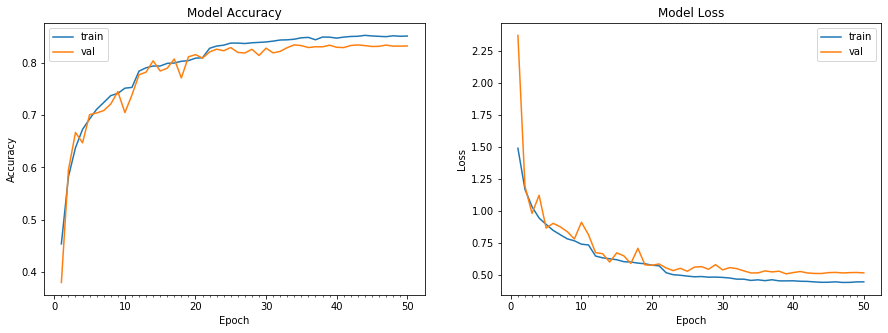

Accuracy on test data is: 83.24


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=10, featurewise_center=True, featurewise_std_normalization=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[scheduler])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Epoch 34/50
Learning rate (from LearningRateScheduler):  0.0005
390/390 [==============================] - 23s 59ms/step - loss: 0.4564 - acc: 0.8453 - val_loss: 0.5147 - **val_acc: 0.8345**